<a href="https://colab.research.google.com/github/Poulomi27/Plant-Disease-Detection/blob/main/Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'new-plant-diseases-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F78313%2F182633%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240511%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240511T162712Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D83910ae33158a2e953bc9ef2d1b73be408b10614d0ee5f19ad1f8653919437deaa3e9bf4bb459bff93c0705889f26fccfa37617a25373432ac0f4f81dfdd776028b564281bef6f436f71e167d8b89345e95fbf02774b5b0e29e32864ad7e0f19d842645e3d19e6c5060076d7536a7b71698257b9b0307faa6c3f561a5a9357f1ff5ee7f8f7d2d4b0284a4ef73b6351cf968b80fe4511194ba353cefef2a129e433d1caeec16665bf61b23acf4ea0f8c26c063002e1da133aea3daf0c9655a70f5fe20b73e280ddab04fa4c273b61cfb2aba71f021d6740b0143351e8dce9ca0b2571cc46cca3618df15d1d58670e01fc9968ce98c3e9e19d5a4e768c22ffe4fe'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2897709187 bytes downloaded
Downloaded and uncompressed: new-plant-diseases-dataset
Data source import complete.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

**Model Training and Evaluation**

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 164s 70ms/step - loss: 1.3686 - accuracy: 0.5960 - val_loss: 0.6341 - val_accuracy: 0.8058
Epoch 2/10
2197/2197 [==============================] - 153s 69ms/step - loss: 0.4269 - accuracy: 0.8642 - val_loss: 0.4163 - val_accuracy: 0.8700
Epoch 3/10
2197/2197 [==============================] - 152s 69ms/step - loss: 0.2587 - accuracy: 0.9163 - val_loss: 0.2267 - val_accuracy: 0.9244
Epoch 4/10
2197/2197 [==============================] - 154s 70ms/step - loss: 0.1774 - accuracy: 0.9423 - val_loss: 0.1727 - val_accuracy: 0.9459
Epoch 5/10
2197/2197 [==============================] - 151s 69ms/step - loss: 0.1254 - accuracy: 0.9590 - val_loss: 0.1544 - val_accuracy: 0.9528
Epoch 6/10
2197/2197 [==============================] - 152s 69ms/step - loss: 0.1055 - accuracy: 0.9655 - val_loss: 0.1728 - val_accuracy: 0.9476
Epoch 7/10
2197/2197 [==============================] - 153s 70ms/step - loss: 0.0840 - accuracy: 0.9729 - val_loss: 0

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 51s 23ms/step - loss: 0.0238 - accuracy: 0.9926
Training accuracy: 0.9926310777664185


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 12s 22ms/step - loss: 0.1123 - accuracy: 0.9672
Validation accuracy: 0.9672206044197083


In [ ]:
cnn.save('trained_plant_disease_model.keras')

**Accuracy Vizualization**

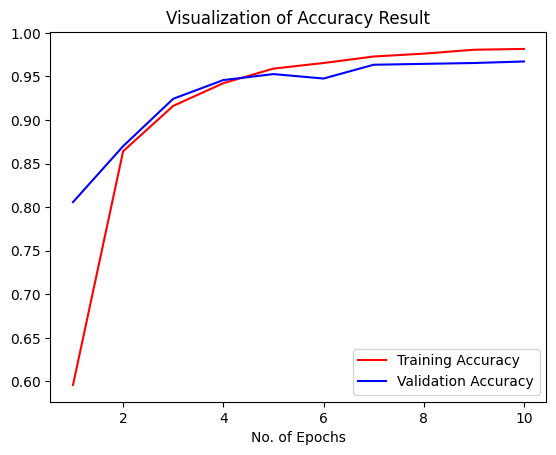

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 46s 3ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       1.00      0.97      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.95      0.96      0.96       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.85      0.97      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.96      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.93      0.

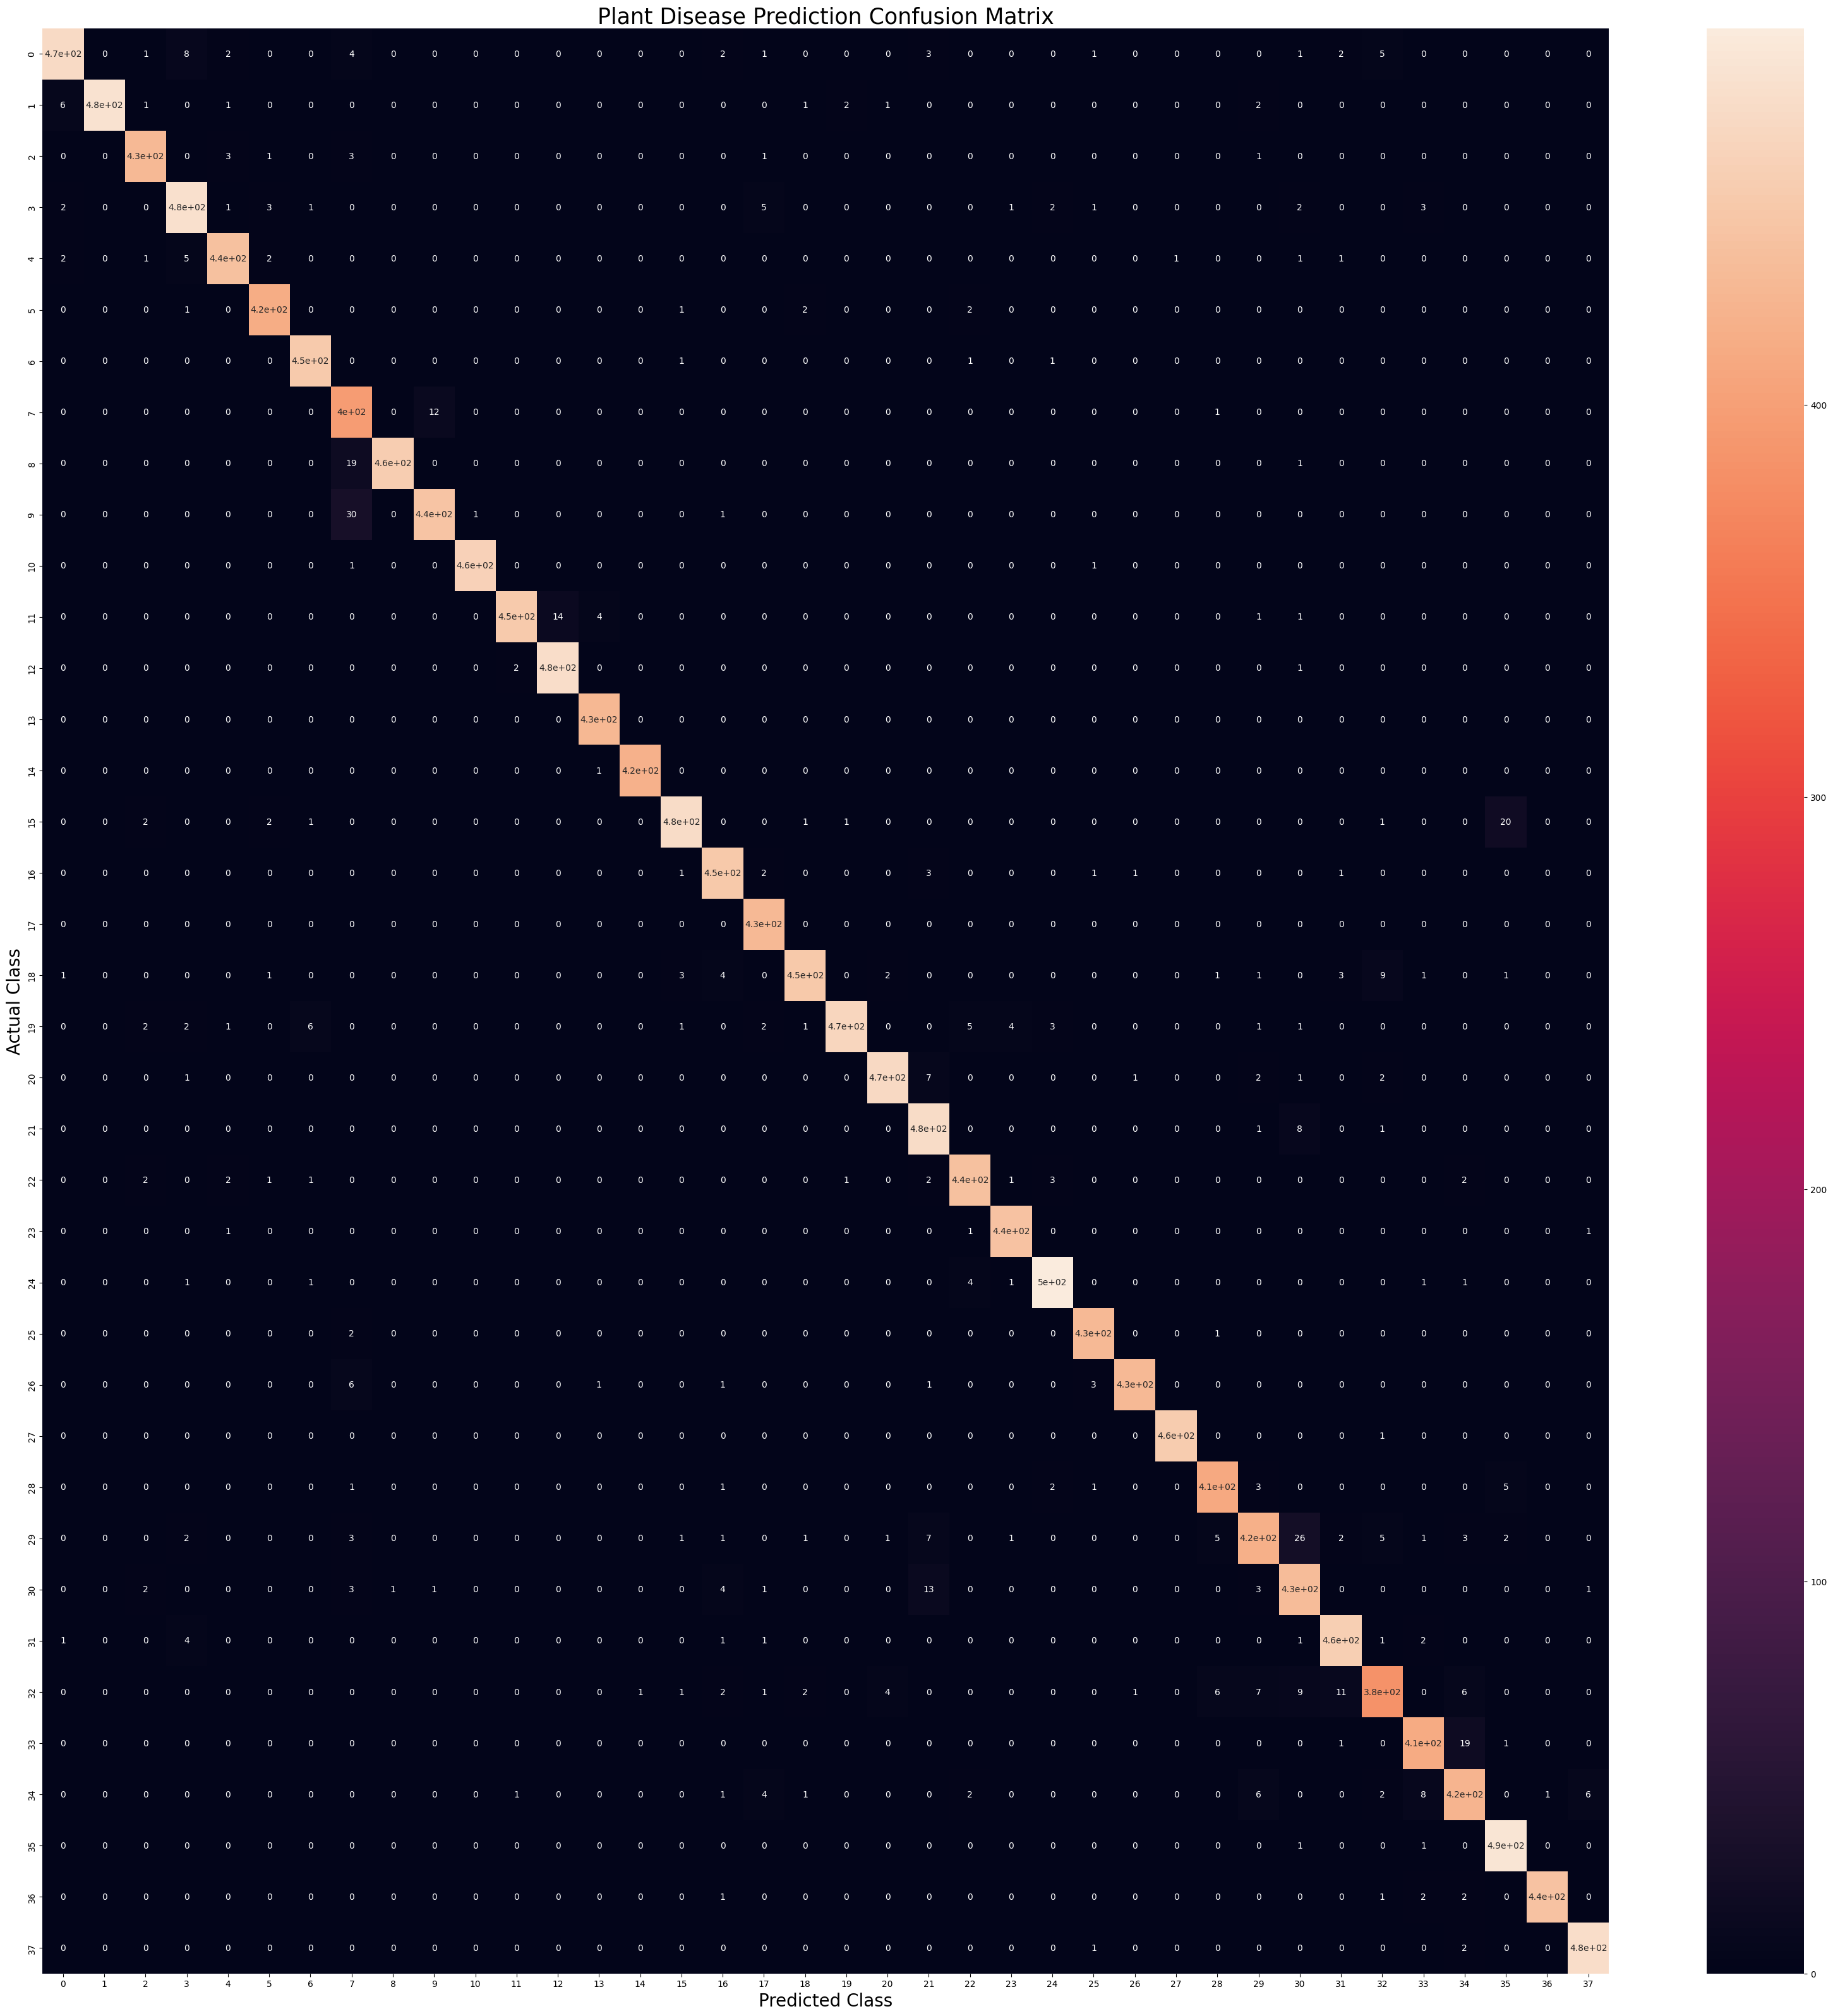

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [ ]:
#cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

OSError: No file or directory found at trained_plant_disease_model.keras

In [ ]:
#Test Image Visualization
#import cv2
#image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
#img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
#plt.imshow(img)
#plt.title('Test Image')
#plt.xticks([])
#plt.yticks([])
#plt.show()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


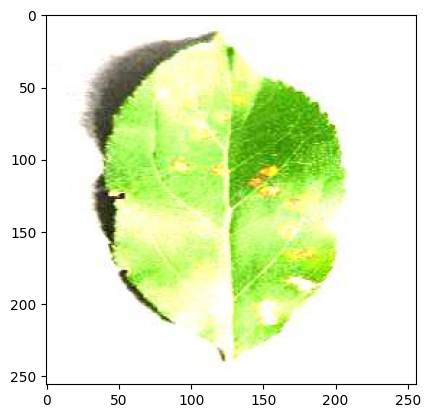

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Assuming 'image_path' is defined and points to your image file
img = cv2.imread('/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG')

# Ensure the image is read correctly
if img is not None:
    # Convert the image data type to np.uint8 if it's not already
    img = np.array(img, dtype=np.uint8)

    # Now convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Displaying the image
    plt.imshow(img)
    plt.show()
else:
    print("Error: Image not found or path is incorrect")


In [ ]:
image = tf.keras.preprocessing.image.load_img('/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG',target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 385ms/step


In [ ]:
print(predictions)

[[3.00021018e-15 1.08781047e-16 1.00000000e+00 4.33436500e-16
  6.52732798e-11 3.34851911e-13 3.08383487e-17 7.12359685e-16
  6.33352860e-19 2.61438006e-19 1.91578830e-19 1.21412500e-14
  3.00481465e-15 8.63626356e-18 1.33084343e-14 1.07162207e-12
  3.80500075e-13 1.51799925e-14 1.60906478e-14 3.04663467e-13
  2.19631962e-19 2.94792695e-19 5.52256969e-15 1.62261612e-14
  2.32805814e-17 3.47791384e-16 1.31473039e-16 1.26132274e-18
  3.71515902e-08 7.02095554e-13 2.22925922e-09 1.28882838e-17
  4.35810540e-13 2.32527246e-16 2.51154501e-12 4.17043244e-09
  6.88136397e-13 8.00237680e-15]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


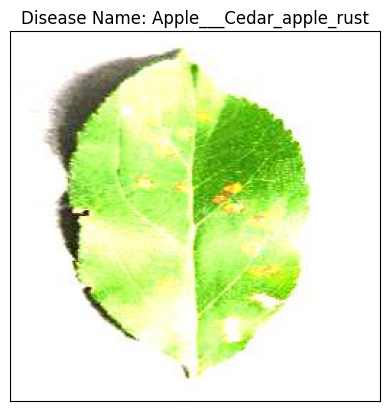

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00


In [ ]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 0.995s


In [ ]:
%%writefile app.py

Writing app.py


In [ ]:
%%writefile app.py
# Install Streamlit and localtunnel



# Write your Streamlit app to a file

import streamlit as st
# Your Streamlit app code goes here



import streamlit as st
import tensorflow as tf
import numpy as np


#Tensorflow Model Prediction
def model_prediction(test_image):
    model = tf.keras.models.load_model("trained_plant_disease_model.keras")
    image = tf.keras.preprocessing.image.load_img(test_image,target_size=(128,128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr]) #convert single image to batch
    predictions = model.predict(input_arr)
    return np.argmax(predictions) #return index of max element

#Sidebar
st.sidebar.title("Dashboard")
app_mode = st.sidebar.selectbox("Select Page",["Home","About","Disease Recognition"])

#Main Page
if(app_mode=="Home"):
    st.header("PLANT DISEASE RECOGNITION SYSTEM")
    image_path = "/home_page.jpeg"
    st.image(image_path,use_column_width=True)
    st.markdown("""
    Welcome to the Plant Disease Recognition System! 🌿🔍

    Our mission is to help in identifying plant diseases efficiently. Upload an image of a plant, and our system will analyze it to detect any signs of diseases. Together, let's protect our crops and ensure a healthier harvest!

    ### How It Works
    1. **Upload Image:** Go to the **Disease Recognition** page and upload an image of a plant with suspected diseases.
    2. **Analysis:** Our system will process the image using advanced algorithms to identify potential diseases.
    3. **Results:** View the results and recommendations for further action.

    ### Why Choose Us?
    - **Accuracy:** Our system utilizes state-of-the-art machine learning techniques for accurate disease detection.
    - **User-Friendly:** Simple and intuitive interface for seamless user experience.
    - **Fast and Efficient:** Receive results in seconds, allowing for quick decision-making.

    ### Get Started
    Click on the **Disease Recognition** page in the sidebar to upload an image and experience the power of our Plant Disease Recognition System!

    ### About Us
    Learn more about the project, our team, and our goals on the **About** page.
    """)

#About Project
elif(app_mode=="About"):
    st.header("About")
    st.markdown("""
                #### About Dataset
                This dataset is recreated using offline augmentation from the original dataset.The original dataset can be found on this github repo.
                This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes.The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure.
                A new directory containing 33 test images is created later for prediction purpose.
                #### Content
                1. train (70295 images)
                2. test (33 images)
                3. validation (17572 images)

                """)

#Prediction Page
elif(app_mode=="Disease Recognition"):
    st.header("Disease Recognition")
    test_image = st.file_uploader("Choose an Image:")
    if(st.button("Show Image")):
        st.image(test_image,width=4,use_column_width=True)
    #Predict button
    if(st.button("Predict")):
        st.snow()
        st.write("Our Prediction")
        result_index = model_prediction(test_image)
        #Reading Labels
        class_name = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
                    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
                    'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                    'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
                    'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                    'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
                    'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                    'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
                    'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
                    'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot',
                    'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
                    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                    'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
                      'Tomato___healthy']
        st.success("Model is Predicting it's a {}".format(class_name[result_index]))

# Run the Streamlit app in the background
#import urllib
#print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))
#!streamlit run app.py &>/content/logs.txt &
# Expose the app to the internet using localtunnel
#!lt --port 8501

Overwriting app.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com


35.232.210.153


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.232.210.153:8501

npx: installed 22 in 2.022s
your url is: https://forty-corners-taste.loca.lt
2024-05-11 19:26:41.050981: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 19:26:41.051026: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 19:26:41.052320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-11 19:26:42.074194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-11 19:27:00.64